- 구글 드라이브 마운트

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로및 시드 고정

In [65]:
DATA_PATH = "/content/drive/MyDrive/01-python/data/"
SEED = 42

In [66]:
import pandas as pd
import numpy as np

# 변수 설명
- customerID : 고객ID
- gender : 성별(1:여성, 0:남성)
- SeniorCitizen : 고령자여부(1:Yes, 0:No)
- Partner : 기혼여부(1:Yes, 0: No)
- Dependents : 부양가족여부(1:Yes, 0:No)
- tenure : 가입기간(월단위)
- PhoneService : 집전화이용여부(1:Yes, 0:No)
- MultipleLines : 다중회선여부(1:Yes, 0:No)
- InternetService : 인터넷이용방식
- OnlineSecurity : 인터넷보안서비스사용여부(1:Yes, 0:No)
- OnlineBackup : 인터넷백업서비스사용여부(1:Yes, 0:No)
- DeviceProtection : 기기방화벽서비스사용여부(1:Yes, 0:No)
- TechSupport : 인터넷기술지원서비스사용여부(1:Yes, 0:No)
- StreamingTV : 스트리밍TV여부(1:Yes, 0:No)
- StreamingMovies : 스트리밍영화여부(1:Yes, 0:No)
- Contract : 약정기간(연단위, 0은 약정없음)
- PaperlessBilling : 지로여부(1:Yes, 0:No)
- PaymentMethod : 지불방법
- MonthlyCharges : 한달요금
- TotalCharges : 총지불요금
- Churn : 이탈여부(1:Yes, 0:No)

- 학습 데이터

In [67]:
train_churn = pd.read_csv(f"{DATA_PATH}train_churn.csv")

- 수치형만 피쳐 추가(정답 제외)

In [68]:
train = train_churn.select_dtypes("number").iloc[:,:-1] # 끝에 정답값이 있어서 제외함

- 범주형 고유값 개수 파악

In [69]:
train_churn.select_dtypes("object").nunique()

customerID         5282
InternetService       3
PaymentMethod         4
dtype: int64

- 원핫 인코딩

In [70]:
from sklearn.preprocessing import OneHotEncoder
cols = ["InternetService","PaymentMethod"]
enc = OneHotEncoder(handle_unknown='ignore') # 오류무시

tmp = pd.DataFrame(
    enc.fit_transform(train_churn[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train = pd.concat([train, tmp], axis=1)
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,0,0,0,0,...,0,25.30,25.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0,0,0,1,...,0,75.15,525.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0,0,0,0,...,0,20.05,85.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,0,0,0,...,0,76.00,2215.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,0,0,0,...,0,75.10,270.70,0.0,1.0,0.0,0.0,1.0,0.0,0.0


- 피쳐 개수 많이 추가하기

In [71]:
train.nunique()

gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       73
PhoneService                                  2
MultipleLines                                 2
OnlineSecurity                                2
OnlineBackup                                  2
DeviceProtection                              2
TechSupport                                   2
StreamingTV                                   2
StreamingMovies                               2
Contract                                      3
PaperlessBilling                              2
MonthlyCharges                             1464
TotalCharges                               4972
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
PaymentMethod_Bank transfer (automatic) 

In [72]:
mask = train.nunique() == 2
cols = train.nunique()[mask].index.tolist()
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

- itertools 
    - 효율적인 반복을 위한 이터레이터를 만드는 모듈
    - combinations(iterable, n)
        - 반복가능한 객체에서 n개의 가능한 모든 조합을 튜플 형태로 꺼내준다.

In [73]:
from itertools import combinations

for col in combinations(cols, 2):
    print(col)

('gender', 'SeniorCitizen')
('gender', 'Partner')
('gender', 'Dependents')
('gender', 'PhoneService')
('gender', 'MultipleLines')
('gender', 'OnlineSecurity')
('gender', 'OnlineBackup')
('gender', 'DeviceProtection')
('gender', 'TechSupport')
('gender', 'StreamingTV')
('gender', 'StreamingMovies')
('gender', 'PaperlessBilling')
('gender', 'InternetService_DSL')
('gender', 'InternetService_Fiber optic')
('gender', 'InternetService_No')
('gender', 'PaymentMethod_Bank transfer (automatic)')
('gender', 'PaymentMethod_Credit card (automatic)')
('gender', 'PaymentMethod_Electronic check')
('gender', 'PaymentMethod_Mailed check')
('SeniorCitizen', 'Partner')
('SeniorCitizen', 'Dependents')
('SeniorCitizen', 'PhoneService')
('SeniorCitizen', 'MultipleLines')
('SeniorCitizen', 'OnlineSecurity')
('SeniorCitizen', 'OnlineBackup')
('SeniorCitizen', 'DeviceProtection')
('SeniorCitizen', 'TechSupport')
('SeniorCitizen', 'StreamingTV')
('SeniorCitizen', 'StreamingMovies')
('SeniorCitizen', 'Paperless

In [74]:
for col in combinations(cols, 2):
    train[f"{col[0]}_{col[1]}"] = train[col[0]] + train[col[1]] 
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No_PaymentMethod_Bank transfer (automatic),InternetService_No_PaymentMethod_Credit card (automatic),InternetService_No_PaymentMethod_Electronic check,InternetService_No_PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic)_PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic)_PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic)_PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic)_PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic)_PaymentMethod_Mailed check,PaymentMethod_Electronic check_PaymentMethod_Mailed check
0,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,0,0,0,7,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1,0,0,1,4,1,0,0,0,0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1,0,0,0,3,1,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,1,0,1,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5278,1,0,1,1,23,1,1,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5279,0,0,1,1,12,1,0,0,0,0,...,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5280,0,1,0,0,12,1,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


- 스케일링

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data = scaler.fit_transform(train)
x_data = pd.DataFrame(x_data,columns=train.columns)
x_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No_PaymentMethod_Bank transfer (automatic),InternetService_No_PaymentMethod_Credit card (automatic),InternetService_No_PaymentMethod_Electronic check,InternetService_No_PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic)_PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic)_PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic)_PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic)_PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic)_PaymentMethod_Mailed check,PaymentMethod_Electronic check_PaymentMethod_Mailed check
0,0.0,0.0,0.0,1.0,0.013889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.097222,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.055556,1.0,0.0,0.0,0.0,0.0,...,1.0,0.5,0.5,0.5,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.402778,1.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.041667,1.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


- 정답값

In [76]:
y_data = train_churn.Churn
y_data.mean()

0.2631578947368421

- 전체 피쳐를 넣고 CV 검증 결과 확인해보기

In [77]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,x_data,y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8249502797292291

# Feature Selection

## 모델의 중요도 또는 가중치를 기반으로 feature를 선택

In [78]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [79]:
select = SelectFromModel(RandomForestClassifier(random_state=SEED))
select.fit(x_data,y_data)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [80]:
select.transform(x_data).shape #성능 좋은 특정 피쳐 골라서 반환해줌

(5282, 26)

In [81]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8297591279866566

## 중요하지 않은 피쳐를 하나씩 제거하면서 최적의 피쳐를 선택

In [82]:
from sklearn.feature_selection import RFE
select = RFE(estimator=RandomForestClassifier(random_state=SEED),n_features_to_select=40)
select.fit(x_data,y_data)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

In [83]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8260625227381684

## 각 피쳐와 정답값 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법




In [84]:
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k=30) # 통계적 개수 k 개
select.fit(x_data,y_data)

SelectKBest(k=30)

In [85]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8298117071312421

- k 개가 아니라 퍼센트로 선택하기

In [86]:
from sklearn.feature_selection import SelectPercentile # ****

select = SelectPercentile(percentile=15) # 피쳐의 비율로 
select.fit(x_data,y_data)

SelectPercentile(percentile=15)

In [87]:
select.transform(x_data).shape

(5282, 32)

In [88]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8292250164162025

## 응용1

In [89]:
from tqdm.auto import tqdm 
cv_scores = [] 
for p in tqdm(range(5,96,1)): # 가장 높음 퍼센트 값을 책정하겠다.
    select = SelectPercentile(percentile=p) 
    select.fit(x_data,y_data) 
    model = LGBMClassifier(random_state=SEED) 
    scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append( [p,scores.mean()] )

cv_scores = np.array(cv_scores) 
idx = np.argmax(cv_scores[:,1])
best_score = cv_scores[idx]
best_score

  0%|          | 0/91 [00:00<?, ?it/s]

array([18.        ,  0.83107653])

- 시각화 해보기

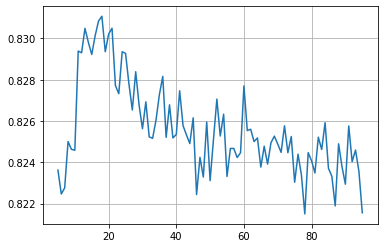

In [90]:
import matplotlib.pyplot as plt
plt.plot(cv_scores[:,0],cv_scores[:,1])
plt.grid()
plt.show()

In [91]:
select = SelectPercentile(percentile=best_score[0])
select.fit(x_data,y_data)

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,select.transform(x_data),y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.831076525542068

## 응용2

In [92]:
model = LGBMClassifier(random_state=SEED)
model.fit(x_data,y_data)

LGBMClassifier(random_state=42)

In [93]:
ft_imp = model.feature_importances_.copy()
ft_imp

array([  5,   1,   1,   1, 303,   5,   0,   2,   2,   1,   7,   0,   1,
        94,   3, 387, 400,   0,   0,   0,   0,   1,   1,   1,  18,  11,
        20,   8,  14,   9,  16,  16,  11,  19,  29,  18,  13,   6,   4,
        11,  10,  19,   8,   4,  14,   3,   8,  13,   5,   5,  12,  10,
        17,  19,   9,   9,   4,  12,  21,  13,  16,  18,   8,  15,  23,
        10,  14,  17,  28,  15,  16,   8,   4,   5,  17,   2,  11,   7,
        10,   6,  10,  19,  12,  11,   9,   4,  10,   8,   5,   1,  13,
        15,   8,  16,   0,   5,   5,   2,   4,   2,   5,  15,   9,   0,
         0,   5,   4,   5,   0,   6,  13,  15,   6,  22,  23,  10,   3,
        10,   5,  10,  10,  11,   8,  15,   7,  13,   6,   8,  14,   0,
         2,  19,  17,  10,   7,   6,  10,  23,   7,  10,  34,   8,   6,
         4,  10,   6,   8,   8,   7,  10,  12,  13,   2,   4,   0,   9,
        14,  15,  15,  14,  10,  25,   2,   7,  11,  10,   6,  10,   7,
         9,   9,   6,   8,   2,  10,   4,   7,   8,  10,   3,  1

In [94]:
cv_scores = []
for i in tqdm(range(30)):
    mask = ft_imp > i 
    cols = x_data.columns[mask].tolist()
    model = LGBMClassifier(random_state=SEED)
                                    
    scores = cross_val_score(model,x_data[cols],y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append([i,scores.mean()]) 

cv_scores = np.array(cv_scores) 
idx = np.argmax(cv_scores[:,1]) 
best_score = cv_scores[idx]
best_score

  0%|          | 0/30 [00:00<?, ?it/s]

array([19.        ,  0.83134468])

- 시각화 해보기

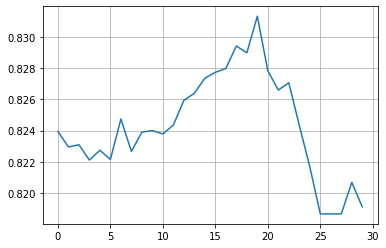

In [95]:
plt.plot(cv_scores[:,0],cv_scores[:,1])
plt.grid()
plt.show()

In [96]:
mask = ft_imp > best_score[0]

model = LGBMClassifier(random_state=SEED)
                               
scores = cross_val_score(model,x_data.loc[:,mask],y_data,cv = cv ,scoring='roc_auc',n_jobs = -1)
scores.mean()

0.8313446843097043

# Category Encoders
- 다양한 기법을 통해 범주형 변수를 숫자로 인코딩해주는 라이브러리
- https://contrib.scikit-learn.org/category_encoders/

In [97]:
!pip install category_encoders # 인기많음

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import category_encoders as ce

- tenure(가입기간)을 범주형 변수라고 가정하고 인코딩을 진행해보자.

In [99]:
train_churn.nunique()

customerID          5282
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1464
TotalCharges        4972
Churn                  2
dtype: int64

- category_encoders를 이용해 인코딩을 하기 위해서는 카테고리 자료형으로 변경해줘야한다.

In [100]:
train_churn["tenure"] = train_churn["tenure"].astype("category") #object 가능할듯

## CountEncoder

In [101]:
cols = ["tenure"]
enc = ce.count.CountEncoder(return_df=False) # return_df=True == DataFrame , Flase == numpy
enc.fit_transform(train_churn[cols]) # 2차원 배열로 넣어줘야함 (DataFrame)

array([[452],
       [ 96],
       [135],
       ...,
       [ 91],
       [ 91],
       [ 56]])

- 순서형 인코더는 생략!

In [102]:
ce.ordinal.OrdinalEncoder

category_encoders.ordinal.OrdinalEncoder

## OneHotEncoder

In [103]:
enc = ce.one_hot.OneHotEncoder(return_df=False)
enc.fit_transform(train_churn[cols])

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
enc.fit_transform(train_churn[cols]).shape

(5282, 73)

## BinaryEncoder

- 001
- 010
- 011



In [105]:
enc = ce.binary.BinaryEncoder(return_df=False) # 2진수 변경하여 각각 컬럼이됨
enc.fit_transform(train_churn[cols])

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0]])

In [106]:
enc.fit_transform(train_churn[cols]).shape

(5282, 7)

## TargetEncoder

In [107]:
enc = ce.target_encoder.TargetEncoder(return_df=False) # 과적합 요소가 있음
enc.fit_transform(train_churn[cols],y_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


array([[0.61283186],
       [0.36458333],
       [0.48888889],
       ...,
       [0.35164835],
       [0.35164835],
       [0.21428571]])

# Over sampling
- 클래스 불균형 문제를 해결하는 방법
- 적은 클래스에 대하여 증식을 시키는 방식
- 대표적으로 SMOTE 방식이 있다.

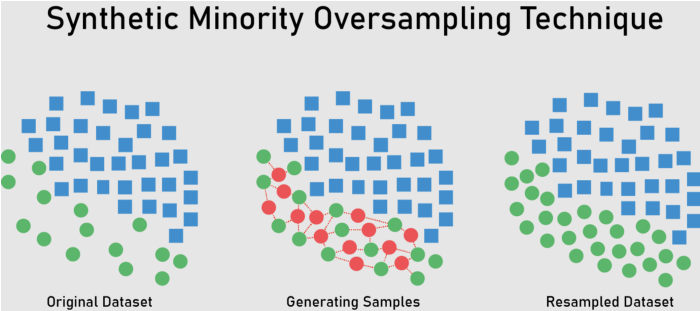

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x_data,y_data, random_state=SEED , test_size = 0.2)
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((4225, 214), (1057, 214), (4225,), (1057,))

In [109]:
from sklearn.metrics import roc_auc_score
model = LGBMClassifier(random_state=SEED)
model.fit(x_train,y_train)
pred = model.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid,pred) 

0.8271181007079902

- 오버샘플링된 학습데이터를 학습하여 검증데이터 평가해보기

In [110]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED,n_jobs=-1)

In [111]:
y_train.mean() # 1에 대한 비율

0.2608284023668639

In [112]:
x_train_resample, y_train_resample = smote.fit_resample(x_train,y_train)
x_train_resample.shape , y_train_resample.shape

((6246, 214), (6246,))

In [113]:
y_train_resample.mean() # 1에 대한 비율 늘어남 shuffle 해주는게 좋음

0.5

In [114]:
model = LGBMClassifier(random_state=SEED)
model.fit(x_train_resample, y_train_resample)
pred = model.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid,pred)

0.8298340196503396

# 모델 앙상블

In [115]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [116]:
model_list = [
    XGBClassifier(random_state=SEED), 
    LogisticRegression(random_state=SEED),
    RandomForestClassifier(random_state=SEED),
    MLPClassifier(random_state=SEED),
    LGBMClassifier(random_state=SEED)
]
for model in tqdm(model_list):
    model.fit(x_train,y_train)

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 산술평균 앙상블

In [117]:
pred_list = [] 
for model in model_list:
    pred = model.predict_proba(x_valid)[:,1] 
    score = roc_auc_score(y_valid,pred)
    print(score) # 모델들의 성능 보기 비교해서 불필요한 모델은 걸래내자
    pred_list.append(pred)
    
pred = np.mean(pred_list,axis=0) 

0.846481722294466
0.8428040564947262
0.7930347854356307
0.7871581960699322
0.8271181007079902


In [118]:
roc_auc_score(y_valid,pred) 

0.8341889719693685

## 모델별로 가능한 모든 조합을 통해 최적에 앙상블 모델 조합을 찾아보기 

In [119]:
best_score = 0 
for i in range(2, len(model_list)): # 2~model_list 만큼 비교하겠다.
    for models in combinations(model_list, i):

        preds = [ model.predict_proba(x_valid)[:,1] for model in models]
        pred = np.mean(preds,axis=0) 
        score = roc_auc_score(y_valid,pred) 
        if best_score < score: 
            best_score = score 
            best_models = models , score 
best_models

((XGBClassifier(random_state=42), LogisticRegression(random_state=42)),
 0.847608275538217)

## power mean (멱평균)

In [120]:
p = 2 # 1.2 , 3.5 등 최적의 값 을 찾아보기
preds = [ model.predict_proba(x_valid)[:,1] for model in best_models[0]]
preds = np.array(preds) ** p 
pred = np.mean(preds,axis=0) ** (1/p) 
roc_auc_score(y_valid,pred)

0.8473689676347348

## 단일 모델에 대한 K-Fold 앙상블
## 요즘방식

In [121]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

model_list = []
score_list = []
for tri,vai in cv.split(x_data):
    # 학습데이터
    x_train = x_data.iloc[tri]
    y_train = y_data.iloc[tri]
    # 검증데이터
    x_valid = x_data.iloc[vai]
    y_valid = y_data.iloc[vai]
    
    # 모델 학습
    model = XGBClassifier(random_state=SEED,n_estimators=1000)
    model.fit(x_train,y_train , eval_set = [(x_valid,y_valid)],early_stopping_rounds=50) #early_stopping_rounds 50 회 이상 개선이없으면 n_estimators(부스팅) 을 멈추겠다,eval_set 부스팅될떄마다 검증셋 검증

    pred = model.predict_proba(x_valid)[:,1] 
    score = roc_auc_score(y_valid,pred) 
    score_list.append(score) 
    model_list.append(model) 

score_list

[0]	validation_0-error:0.222327
Will train until validation_0-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.209082
[2]	validation_0-error:0.212867
[3]	validation_0-error:0.210974
[4]	validation_0-error:0.20719
[5]	validation_0-error:0.20719
[6]	validation_0-error:0.205298
[7]	validation_0-error:0.205298
[8]	validation_0-error:0.200568
[9]	validation_0-error:0.199622
[10]	validation_0-error:0.204352
[11]	validation_0-error:0.199622
[12]	validation_0-error:0.206244
[13]	validation_0-error:0.20246
[14]	validation_0-error:0.203406
[15]	validation_0-error:0.201514
[16]	validation_0-error:0.199622
[17]	validation_0-error:0.198675
[18]	validation_0-error:0.200568
[19]	validation_0-error:0.194891
[20]	validation_0-error:0.194891
[21]	validation_0-error:0.195837
[22]	validation_0-error:0.197729
[23]	validation_0-error:0.196783
[24]	validation_0-error:0.195837
[25]	validation_0-error:0.198675
[26]	validation_0-error:0.195837
[27]	validation_0-error:0.192999
[28]	validation_0-error

[0.8489334994942928,
 0.846426918448579,
 0.8581700133930849,
 0.8487370824492199,
 0.8225622775800712]

In [122]:
np.mean(score_list) 

0.8449659582730495

In [123]:
model_list

[XGBClassifier(n_estimators=1000, random_state=42),
 XGBClassifier(n_estimators=1000, random_state=42),
 XGBClassifier(n_estimators=1000, random_state=42),
 XGBClassifier(n_estimators=1000, random_state=42),
 XGBClassifier(n_estimators=1000, random_state=42)]

In [123]:
 for models in model_list:
     model.predict_proba #<- 반복문으로 최적 모델찾기 
best_score = 0 
for i in range(2, len(model_list)): # 2~model_list 만큼 비교하겠다.
    for models in combinations(model_list, i):

        preds = [ model.predict_proba(x_valid)[:,1] for model in models]
        pred = np.mean(preds,axis=0) 
        score = roc_auc_score(y_valid,pred) 
        if best_score < score: 
            best_score = score 
            best_models = models , score 
best_models